In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargar datos del club
datos_club = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
datos_club.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [4]:
# Revisar información general
datos_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha_partido           100 non-null    object
 1   equipo_local            100 non-null    object
 2   equipo_visitante        100 non-null    object
 3   goles_local             100 non-null    int64 
 4   goles_visitante         100 non-null    int64 
 5   posesion_local (%)      100 non-null    int64 
 6   posesion_visitante (%)  100 non-null    int64 
 7   tiros_arco_local        100 non-null    int64 
 8   tiros_arco_visitante    100 non-null    int64 
 9   estadio                 100 non-null    object
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [5]:
# Encontrar y manejar datos faltantes
datos_club.isnull().sum()
datos_club['goles_totales'] = datos_club['goles_local'].fillna(datos_club['goles_local'].mean())
print("Valores nulos antes de imputación")
print(datos_club.isnull().sum())

Valores nulos antes de imputación
fecha_partido             0
equipo_local              0
equipo_visitante          0
goles_local               0
goles_visitante           0
posesion_local (%)        0
posesion_visitante (%)    0
tiros_arco_local          0
tiros_arco_visitante      0
estadio                   0
goles_totales             0
dtype: int64


In [6]:
# One-Hot Enconig para equipos
datos_preparados = pd.get_dummies(datos_club, columns=['equipo_local', 'equipo_visitante']) # La función get_dummies convierte los equipos en columnas binarias
datos_preparados.head()

,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,goles_totales,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,2,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,1,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,1,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,2,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,5,False,False,True,False,False,False,True,False,False,False


In [7]:
# Eliminar filas duplicadas
datos_preparados.drop_duplicates(inplace=True)

print(f'Filas antes de eliminar duplicados:',len(datos_preparados))
datos_preparados.drop_duplicates(inplace=True)
print(f'Filas después de eliminar duplicados:',len(datos_preparados))

Filas antes de eliminar duplicados: 100
Filas después de eliminar duplicados: 100


In [8]:
# Manejar Fechas
datos_preparados['fecha_partido'] = pd.to_datetime(datos_preparados['fecha_partido'],errors='coerce')
print("Fechas invalidas (Nat) luego de la conversión")
print(datos_preparados['fecha_partido'].isnull().sum())

Fechas invalidas (Nat) luego de la conversión
0


In [9]:
print(datos_preparados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   fecha_partido                     100 non-null    datetime64[ns]
 1   goles_local                       100 non-null    int64         
 2   goles_visitante                   100 non-null    int64         
 3   posesion_local (%)                100 non-null    int64         
 4   posesion_visitante (%)            100 non-null    int64         
 5   tiros_arco_local                  100 non-null    int64         
 6   tiros_arco_visitante              100 non-null    int64         
 7   estadio                           100 non-null    object        
 8   goles_totales                     100 non-null    int64         
 9   equipo_local_Atlético Python      100 non-null    bool          
 10  equipo_local_Cebollitas FC        100 non-null    b

In [10]:
print("Columnas con valores nulos tras limpieza:")
print(datos_preparados.isnull().sum())

Columnas con valores nulos tras limpieza:
fecha_partido                       0
goles_local                         0
goles_visitante                     0
posesion_local (%)                  0
posesion_visitante (%)              0
tiros_arco_local                    0
tiros_arco_visitante                0
estadio                             0
goles_totales                       0
equipo_local_Atlético Python        0
equipo_local_Cebollitas FC          0
equipo_local_Data United            0
equipo_local_NumPy City             0
equipo_local_Real Pandas            0
equipo_visitante_Atlético Python    0
equipo_visitante_Cebollitas FC      0
equipo_visitante_Data United        0
equipo_visitante_NumPy City         0
equipo_visitante_Real Pandas        0
dtype: int64


In [11]:
print("Vista final del dataset final:")
display(datos_preparados.head())

Vista final del dataset final:


,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,goles_totales,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,2,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,1,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,1,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,2,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,5,False,False,True,False,False,False,True,False,False,False


In [12]:
print("Shape final del dataset preparado",datos_preparados.shape)

Shape final del dataset preparado (100, 19)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de los partidos
df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')

# Monstrar primeras filas
df_partidos.head(6)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena


In [14]:
# Estadisticas descriptivas generales
df_partidos.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [15]:
# Promedio de goles cebollitas y visitante
goles_local_cebollitas = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']['goles_local'].mean()
goles_visitante_cebollitas = df_partidos[df_partidos['equipo_visitante'] == 'Cebollitas FC']['goles_visitante'].mean()

print('Promedio de goles cebollitas como local:',goles_local_cebollitas)
print('Promedio de goles cebollitas como visitante:',goles_visitante_cebollitas)

Promedio de goles cebollitas como local: 2.230769230769231
Promedio de goles cebollitas como visitante: 2.611111111111111


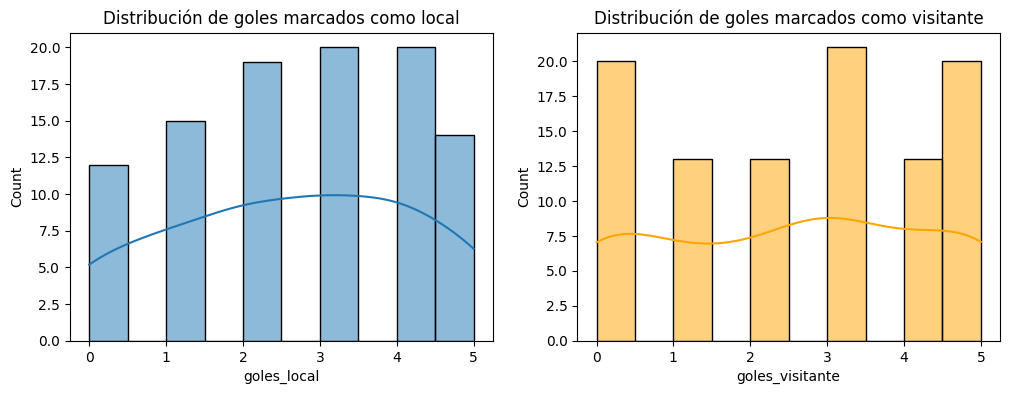

In [16]:
# Histogramas de goles marcados local y visitante
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_partidos['goles_local'],kde=True,ax=ax[0],bins=10)
ax[0].set_title('Distribución de goles marcados como local')
sns.histplot(df_partidos['goles_visitante'],kde=True,ax=ax[1],bins=10,color='orange')
ax[1].set_title('Distribución de goles marcados como visitante')
plt.show()

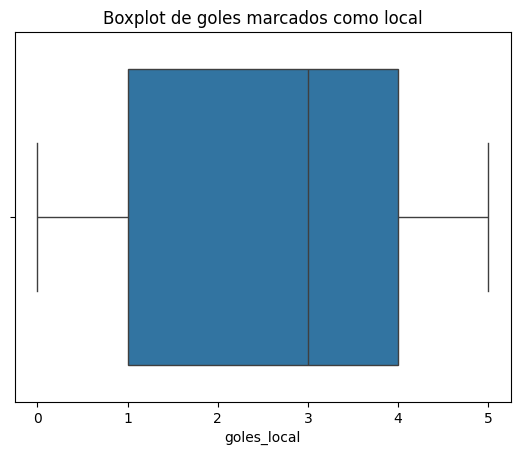

In [17]:
# Boxplot para goles del equipo local
sns.boxplot(x=df_partidos['goles_local'])
plt.title('Boxplot de goles marcados como local')
plt.show()

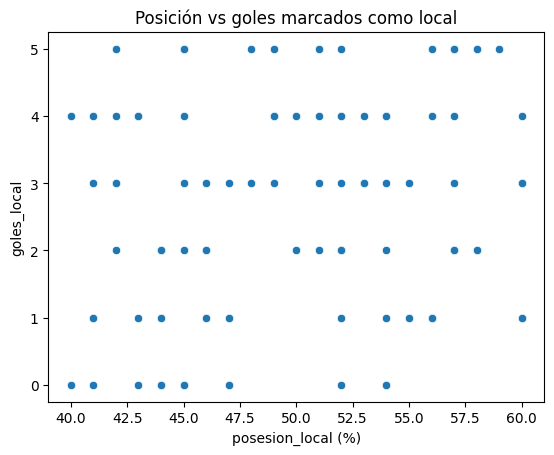

In [18]:
# Scatterplot de posición vs goles marcados (local)
sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_partidos)
plt.title('Posición vs goles marcados como local')
plt.show()

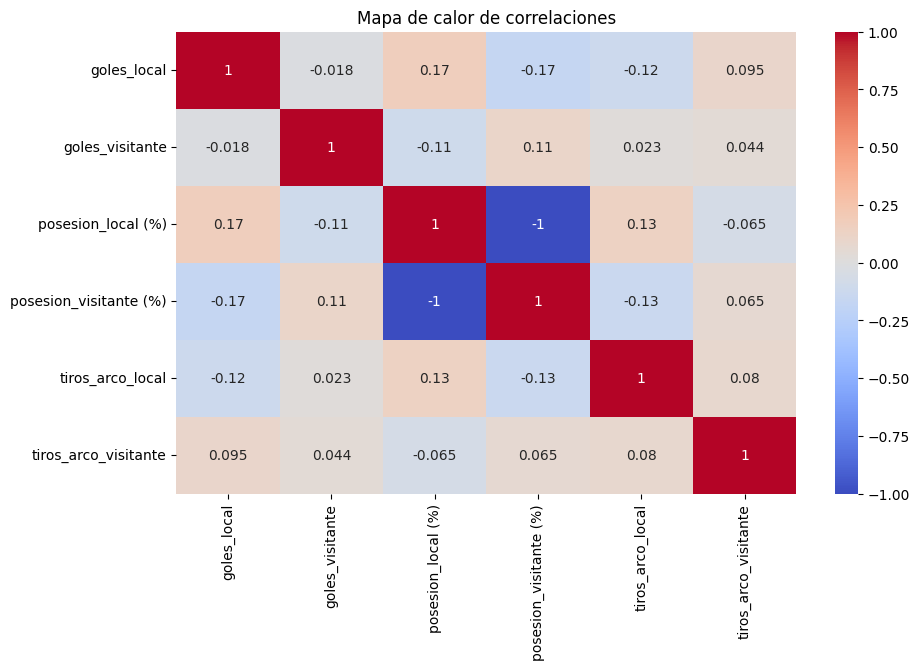

In [19]:
# Mapa de calor de correlaciones entre variables clave
plt.figure(figsize=(10,6))
sns.heatmap(df_partidos[['goles_local','goles_visitante','posesion_local (%)',
                         'posesion_visitante (%)','tiros_arco_local',
                         'tiros_arco_visitante']].corr(),annot=True,cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar datos del partidos
df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
df_partidos.head(5)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [21]:
# Apliar Normalización a tiros al arco de aproximadamente entre 8 a 15 tiros
scaler_norm = MinMaxScaler()
df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])
# Ver resultados
print(df_partidos[['tiros_arco_local','tiros_arco_local_norm']].head(6))
print(df_partidos[['tiros_arco_visitante','tiros_arco_visitante_norm']].head(6))

   tiros_arco_local  tiros_arco_local_norm
0                12               1.000000
1                12               1.000000
2                10               0.777778
3                 3               0.000000
4                 7               0.444444
5                 8               0.555556
   tiros_arco_visitante  tiros_arco_visitante_norm
0                     6                   0.333333
1                     3                   0.000000
2                     7                   0.444444
3                     3                   0.000000
4                    12                   1.000000
5                    11                   0.888889


In [22]:
# Aplicar estandarización a la posición (%)
scaler_std = StandardScaler()
df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])
# Ver resultados
print(df_partidos[['posesion_local (%)','posesion_local_std']].head())
print(df_partidos[['posesion_visitante (%)','posesion_visitante_std']].head())

   posesion_local (%)  posesion_local_std
0                  54            0.624415
1                  60            1.623479
2                  55            0.790926
3                  57            1.123947
4                  52            0.291394
   posesion_visitante (%)  posesion_visitante_std
0                      46               -0.624415
1                      40               -1.623479
2                      45               -0.790926
3                      43               -1.123947
4                      48               -0.291394


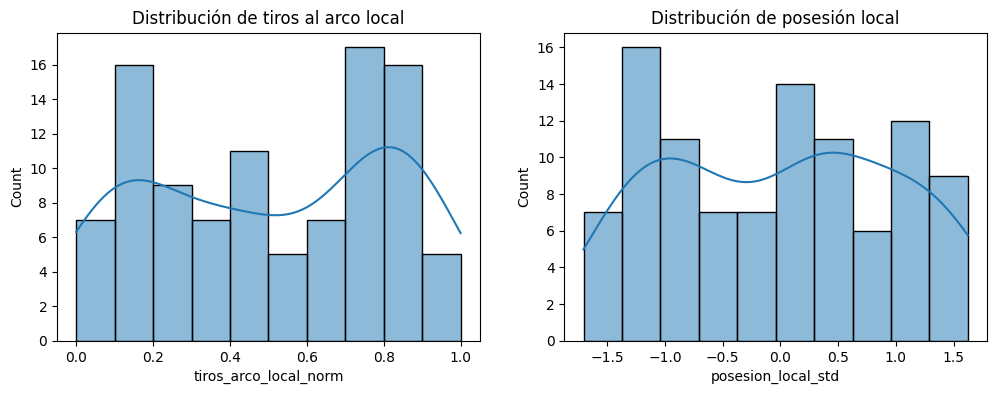

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# Visualizacion tiros al arco (Normalización)
sns.histplot(df_partidos['tiros_arco_local_norm'],kde=True,ax=ax[0],bins=10)
ax[0].set_title('Distribución de tiros al arco local')
# Visualización posesión local (Normalización)
sns.histplot(df_partidos['posesion_local_std'],kde=True,ax=ax[1],bins=10)
ax[1].set_title('Distribución de posesión local')
plt.show()

In [24]:
import pandas as pd
df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [25]:
# Nueva caracteristica diferencia de goles (local - visitantes)
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos[['goles_local','goles_visitante','diferencia_goles']].head()

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2


In [26]:
# Nueva caracteristica: ratio tiros al arco por porcentaje de posición (local)
df_partidos['ratio_posesion_arco_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']
df_partidos[['tiros_arco_local','posesion_local (%)','ratio_posesion_arco_local']].head()

,tiros_arco_local,posesion_local (%),ratio_posesion_arco_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615


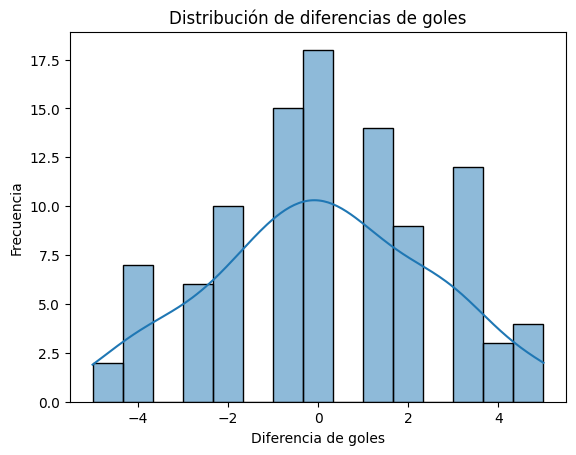

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de diferencias de goles
sns.histplot(df_partidos['diferencia_goles'],kde=True,bins=15)
plt.title('Distribución de diferencias de goles')
plt.xlabel('Diferencia de goles')
plt.ylabel('Frecuencia')
plt.show()

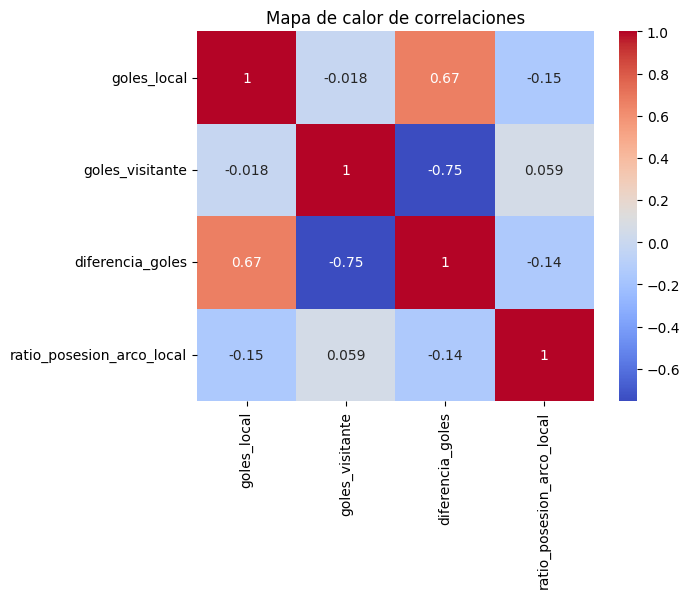

In [28]:
# Análisis de correlaciones
corr_var = ['goles_local','goles_visitante','diferencia_goles','ratio_posesion_arco_local']
corr_matrix = df_partidos[corr_var].corr()

# Mapa de calor
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [29]:
import pandas as pd
df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
# Añadimos claramente variables creadas anteriormente
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos['ratio_posesion_arco_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_posesion_arco_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615


In [30]:
from sklearn.feature_selection import SelectKBest, f_regression
# Variables predictoras y objetivo
X = df_partidos[['posesion_local (%)','tiros_arco_local','ratio_posesion_arco_local']]
y = df_partidos['goles_local']
# Seleccionar las 2 mejores variables
selector = SelectKBest(score_func=f_regression,k=2)
selector.fit(X,y)
# Resultados ordenados por relevancia
scores = selector.scores_
variables = X.columns
resultados = pd.DataFrame({'Variable':variables,'Puntuación':scores})
resultados



,Variable,Puntuación
0,posesion_local (%),2.844159
1,tiros_arco_local,1.372691
2,ratio_posesion_arco_local,2.323320


In [31]:
from sklearn.tree import DecisionTreeRegressor
# Entrenar el arbol de decisiones para medir la temperatura
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X,y)
# Importancia calculada por el modelo
importancia = modelo_arbol.feature_importances_
resultado_importancia = pd.DataFrame({
    'Variable':X.columns,
    'Importancia':importancia
}).sort_values(by='Importancia',ascending=False)
resultado_importancia


,Variable,Importancia
0,posesion_local (%),0.389080
2,ratio_posesion_arco_local,0.355031
1,tiros_arco_local,0.255889


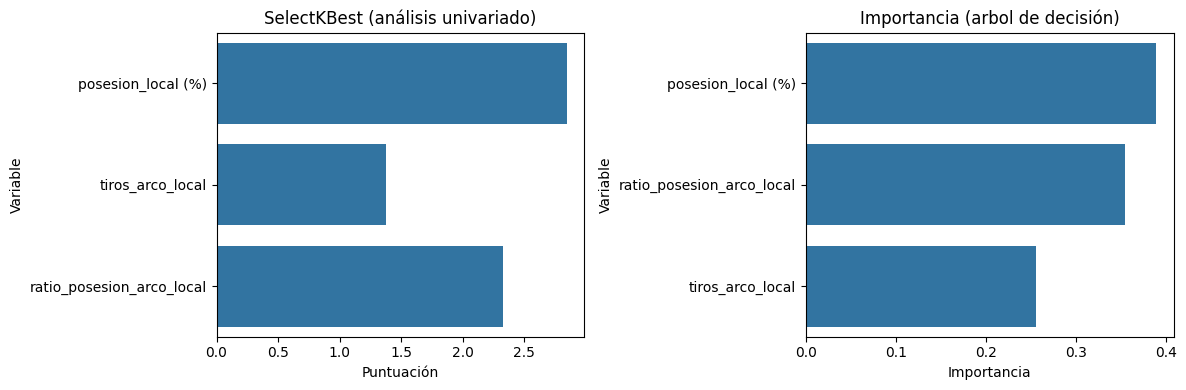

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# Grafica SelectkBest (análisis univariado)
sns.barplot(x='Puntuación',y='Variable',data=resultados,ax=ax[0])
ax[0].set_title('SelectKBest (análisis univariado)')
# Grafico importancia (arbol de decisión)
sns.barplot(x='Importancia',y='Variable',data=resultado_importancia,ax=ax[1])
ax[1].set_title('Importancia (arbol de decisión)')
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

# Cargar datos de partidos
df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2


In [34]:
# Slider interactivo para elegir porcentaje de prueba
slider_test_size = widgets.FloatSlider(
    value=0.2,
    min=0.01,
    max=0.5,
    step=0.05,
    description='% Test Set:',
    continuous_update=False
)
display(slider_test_size)

FloatSlider(value=0.2, continuous_update=False, description='% Test Set:', max=0.5, min=0.01, step=0.05)

In [35]:
def dividir_datos(test_size):
    # Dividir datos en conjuntos de entrenamiento y prueba
    X = df_partidos[['posesion_local (%)','tiros_arco_local','goles_local']]
    y = df_partidos['diferencia_goles']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f'Tamaño del conjunto de entrenamiento: {len(X_train)}')
    print(f'Tamaño del conjunto de prueba: {len(X_test)}')
    return X_train, X_test, y_train, y_test

# Usa widget interactivo
widgets.interact(dividir_datos, test_size=slider_test_size)

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='% Test Set:', max=0.5, min=…

<function __main__.dividir_datos(test_size)>

In [36]:
# División estandar recomendada (80% entrenamientos, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    df_partidos[['posesion_local (%)','tiros_arco_local','goles_local']],
    df_partidos['diferencia_goles'],
    test_size=0.2,
    random_state=42
    )
print("Conjunto de entrenamiento (primeros registros):")
print(X_train.head())
print("\nConjunto de prueba (primeros registros):")
print(X_test.head())

Conjunto de entrenamiento (primeros registros):
    posesion_local (%)  tiros_arco_local  goles_local
55                  51                 6            4
88                  54                 9            0
26                  53                 4            3
42                  52                 4            2
69                  60                 9            1

Conjunto de prueba (primeros registros):
    posesion_local (%)  tiros_arco_local  goles_local
83                  47                 3            3
53                  60                 3            4
70                  50                 5            2
45                  57                 7            5
44                  45                 5            5


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Cargar dataset
df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
# Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
# Variables predictoras
X = df_partidos[['posesion_local (%)','tiros_arco_local']]
y = df_partidos['diferencia_goles']
# División estandar: 80% entrenamientos / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
# Instanciar y entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train,y_train)
print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


In [39]:
# Monstrar coefientes
print(f'Coeficientes: {modelo_rl.coef_}')
print(f'Intercepto: {modelo_rl.intercept_}')
# Interpretación amigable
for idx, col_name in enumerate(X.columns):
    print(f'Si aumentamos 1 unidad en {col_name}, la diferencia de goles aumenta {modelo_rl.coef_[idx]:.2f}')

Coeficientes: [ 0.05596278 -0.05125811]
Intercepto: -2.5257192572329763
Si aumentamos 1 unidad en posesion_local (%), la diferencia de goles aumenta 0.06
Si aumentamos 1 unidad en tiros_arco_local, la diferencia de goles aumenta -0.05


In [40]:
# Hacer predicciones
y_pred = modelo_rl.predict(X_test)
# Comparar predicciones vs valores reales
df_resultados = X_test.copy()
df_resultados['Diferencia_Goles_Real'] = y_test
df_resultados['Diferencia_Goles_Pred'] = y_pred.round(2)
df_resultados.head(10)

,posesion_local (%),tiros_arco_local,Diferencia_Goles_Real,Diferencia_Goles_Pred
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


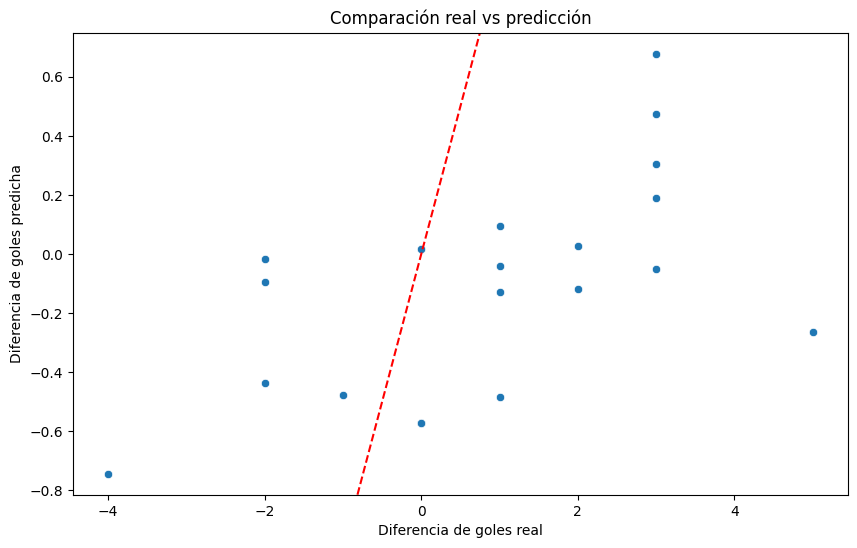

In [41]:
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión real vs predicción
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Diferencia de goles real')
plt.ylabel('Diferencia de goles predicha')
plt.title('Comparación real vs predicción')
plt.axline((0,0),slope=1,color='red',linestyle='--')
plt.show()

In [42]:
import ipywidgets as widgets
# Widgets de entrada
posesion_input = widgets.FloatSlider(min=30,max=70,step=1,description='Posición local (%)')
tiros_input = widgets.FloatSlider(min=1,max=15,step=1,description='Tiros al Arco')
# Función de predicción
def predecir_diferencia_goles(posesion,tiros):
    # Crear un DataFrame
    entrada = pd.DataFrame({'posesion_local (%)':[posesion],'tiros_arco_local':[tiros]})
    # Realizar predicción
    prediccion = modelo_rl.predict(entrada)[0]
    print(f'La diferencia de goles prevista es de {prediccion:.2f} goles.')
# Mostrar widget interactivo
widgets.interact(predecir_diferencia_goles,posesion=posesion_input,tiros=tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posición local (%)', max=70.0, min=30.0, step=1.0),…

<function __main__.predecir_diferencia_goles(posesion, tiros)>

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

X = df_partidos[['posesion_local (%)','tiros_arco_local']]
y = df_partidos['diferencia_goles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train,y_train)

y_pred = modelo_rl.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# Calcular métricas
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
# Mostrar resultados
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 4.96
RMSE: 2.23
R2: -0.03
MAE: 1.89


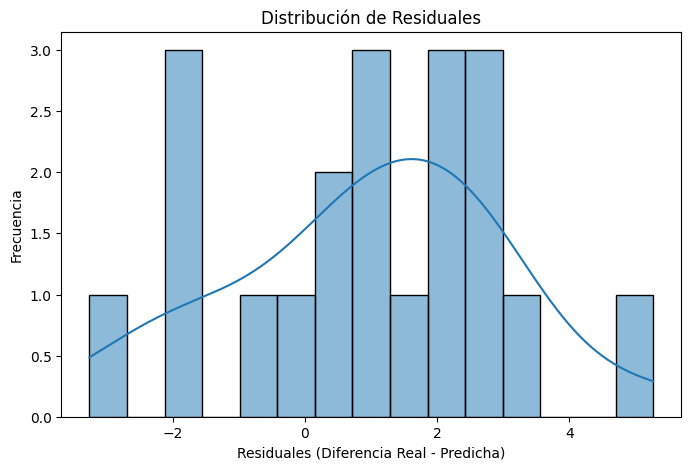

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión real vs predicción
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribución de Residuales')
plt.xlabel('Residuales (Diferencia Real - Predicha)')
plt.ylabel('Frecuencia')
plt.show()

In [46]:
import ipywidgets as widgets
def evaluar_predicciones(threshold_mae):
  calidad = "buena" if mae < threshold_mae else "regular o mala"
  print(f'Tu modelo tiene una MAE de {mae:.2f}, considerando {calidad} (umbral definido: {threshold_mae}).')
umbral_widget = widgets.FloatSlider(min=0.1,max=5,step=0.1,description='Umbral MAE')
widgets.interact(evaluar_predicciones,threshold_mae=umbral_widget)

interactive(children=(FloatSlider(value=0.1, description='Umbral MAE', max=5.0, min=0.1), Output()), _dom_clas…

<function __main__.evaluar_predicciones(threshold_mae)>

In [47]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')

RMSE: 2.23
R2: -0.03


In [48]:
if r2 < 0:
  print("X El modelo no explica la varianza. Peor que adivinar.")
elif r2 < 0.3:
  print("El modelo explica muy poco. Posible underfitting")
else:
  print("El modelo tiene un poder explicativo aceptable.")


X El modelo no explica la varianza. Peor que adivinar.


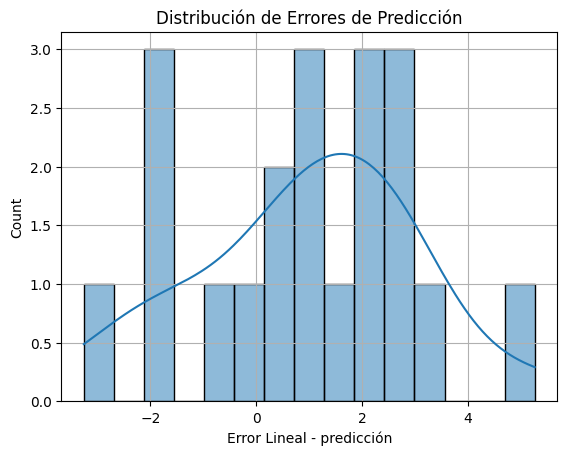

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribución de Errores de Predicción')
plt.xlabel('Error Lineal - predicción')
plt.grid(True)
plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Metricas obtenidas del modelo de regresión lineal
metricas_rl = {
    'Modelo': 'Regresión Lineal',
    'RMSE': 2.23,
    'MAE': 1.89,
    'R2': -0.03
}
# Metricas del arbol de decisión (bonus)
metricas_arbol = {
    'Modelo': 'Árbol de Decisión',
    'RMSE': 0.93,
    'MAE': 0.70,
    'R2': 0.82
}
# Comparación
df_comparacion = pd.DataFrame([metricas_rl,metricas_arbol])
display(df_comparacion)

,Modelo,RMSE,MAE,R2
0,Regresión Lineal,2.23,1.89,-0.03
1,Árbol de Decisión,0.93,0.70,0.82


In [51]:
import pandas as pd
df_jugadores = pd.read_csv('/content/drive/MyDrive/jugadores_cebollitas.csv')
df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


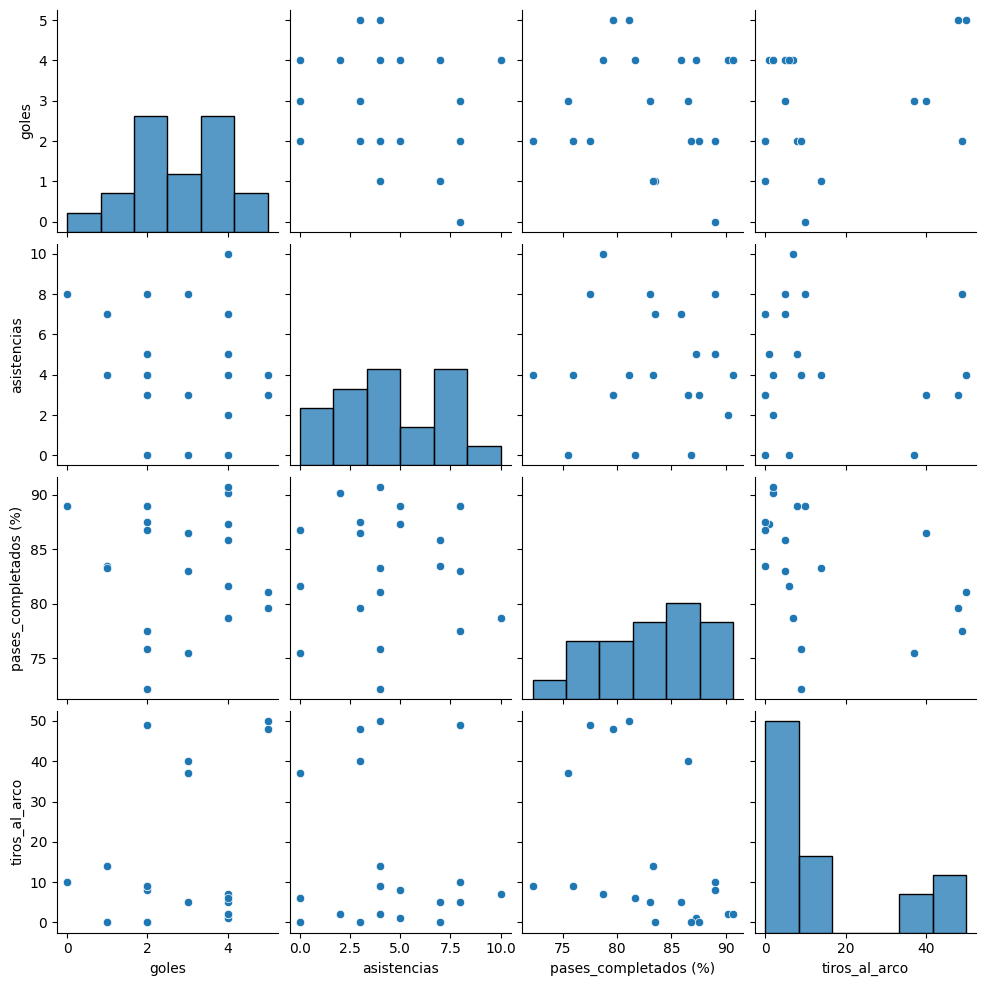

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_jugadores[['goles','asistencias','pases_completados (%)','tiros_al_arco']])
plt.show()

In [53]:
from sklearn.cluster import KMeans

x = df_jugadores[['goles','asistencias','pases_completados (%)','tiros_al_arco']]
kmeans = KMeans(n_clusters=3,random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(x)
df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1


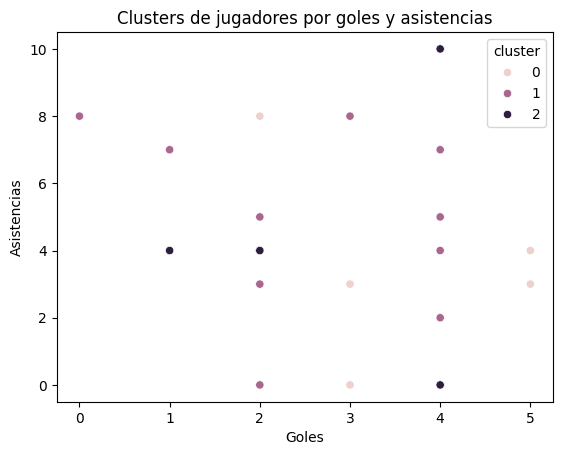

In [54]:
sns.scatterplot(x='goles',y='asistencias',data=df_jugadores,hue='cluster')
plt.title('Clusters de jugadores por goles y asistencias')
plt.xlabel('Goles')
plt.ylabel('Asistencias')
plt.show()

In [55]:
columnas_numericas = ['goles','asistencias','pases_completados (%)','tiros_al_arco']
perfiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
display(perfiles)

,goles,asistencias,pases_completados (%),tiros_al_arco
cluster,,,,
0,3.6,3.6,80.04,44.8
1,2.6,4.9,87.29,3.3
2,2.6,4.4,78.34,9.0


In [58]:
import ipywidgets as widgets
from sklearn.cluster import KMeans

def clustering_interactivo(k):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    df_jugadores['cluster_temp'] = km.fit_predict(x)

    sns.scatterplot(x='goles', y='asistencias', hue='cluster_temp', palette='Set1', data=df_jugadores)
    plt.title(f"Clustering jugadores con {k} clusters")
    plt.xlabel("Goles")
    plt.ylabel("Asistencias")
    plt.show()

widgets.interactive(clustering_interactivo, k=(2,6,1))

interactive(children=(IntSlider(value=4, description='k', max=6, min=2), Output()), _dom_classes=('widget-inte…

In [59]:
import pandas as pd

df_jugadores = pd.read_csv("/content/drive/MyDrive/jugadores_cebollitas.csv")
print(df_jugadores.columns)

Index(['jugador_id', 'nombre', 'posición', 'edad', 'partidos_jugados', 'goles',
       'asistencias', 'pases_completados (%)', 'tiros_al_arco',
       'precisión_tiros (%)', 'minutos_jugados'],
      dtype='object')


In [60]:
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X)

In [61]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
cluster_profiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(cluster_profiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


/tmp/ipython-input-3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


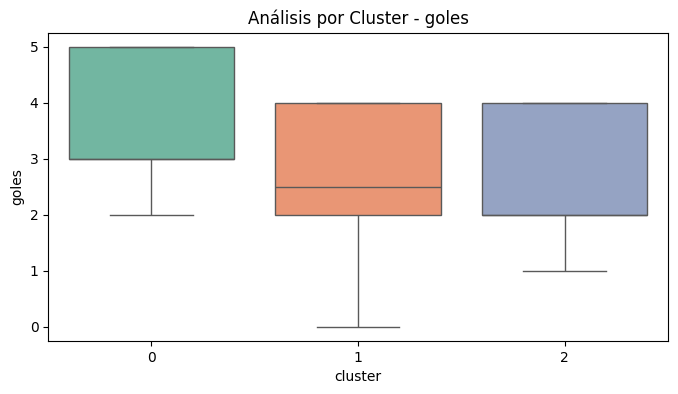

/tmp/ipython-input-3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


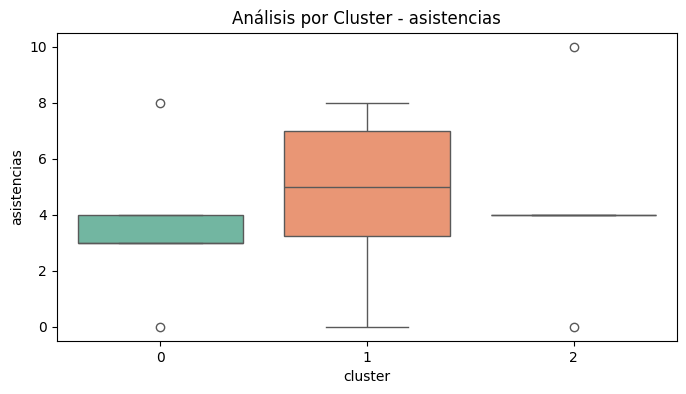

/tmp/ipython-input-3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


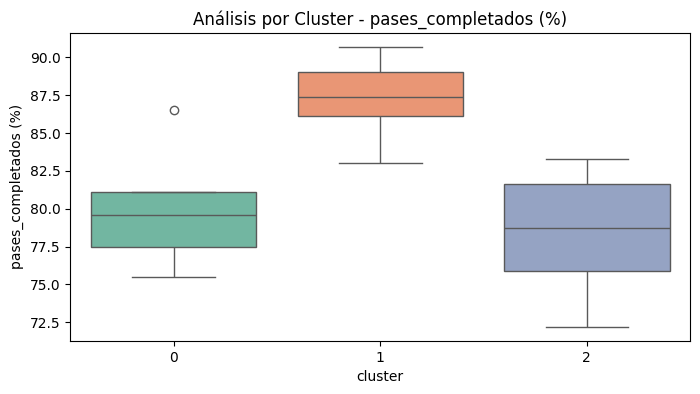

/tmp/ipython-input-3013497276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


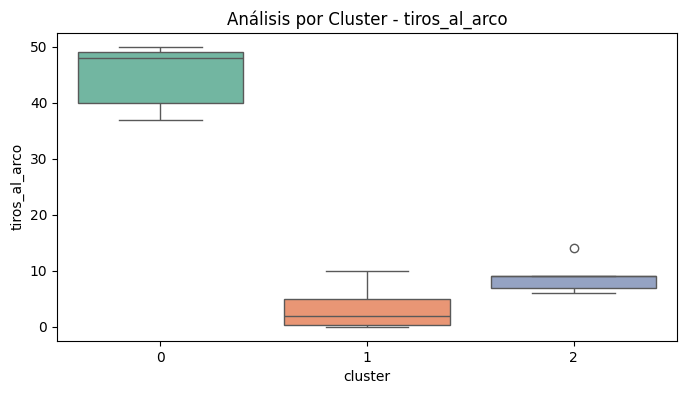

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


features = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')
    plt.title(f'Análisis por Cluster - {feature}')
    plt.show()

In [63]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown interactivo
cluster_selector = widgets.Dropdown(
    options=sorted(df_jugadores['cluster'].unique()),
    description='Cluster:'
)

# Función de despliegue
def mostrar_jugadores(cluster):
    jugadores = df_jugadores[df_jugadores['cluster'] == cluster]
    display(jugadores[['nombre', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

# Activar widget
widgets.interactive(mostrar_jugadores, cluster=cluster_selector)

interactive(children=(Dropdown(description='Cluster:', options=(np.int32(0), np.int32(1), np.int32(2)), value=…

In [65]:
# Manipulación de datos
import pandas as pd

df_jugadores = pd.read_csv("/content/drive/MyDrive/jugadores_cebollitas.csv")
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)

df_jugadores['PC1'] = componentes[:,0]
df_jugadores['PC2'] = componentes[:,1]

<Axes: xlabel='PC1', ylabel='PC2'>

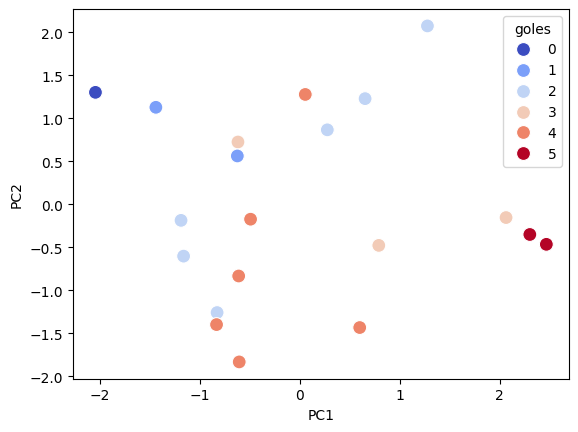

In [68]:
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_jugadores, hue='goles', palette='coolwarm', s=100)

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='PC1', ylabel='PC2'>

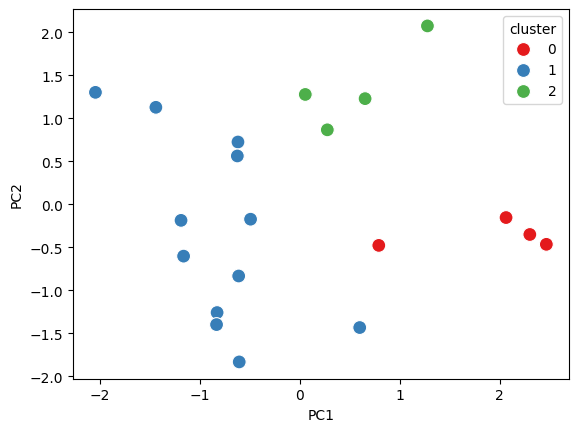

In [70]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=df_jugadores, s=100)

In [71]:
varianza = pca.explained_variance_ratio_

print(f"Varianza explicada por PC1: {varianza[0]:.2%}")
print(f"Varianza explicada por PC2: {varianza[1]:.2%}")
print(f"Varianza total explicada: {varianza.sum():.2%}")

Varianza explicada por PC1: 38.65%
Varianza explicada por PC2: 28.39%
Varianza total explicada: 67.04%


In [72]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


def explorar_componentes(eje_x, eje_y):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=eje_x, y=eje_y, hue='cluster', data=df_jugadores, palette='Set2', s=100)
    plt.title(f'Clusters en espacio {eje_x} vs {eje_y}')
    plt.grid(True)
    plt.show()

widgets.interactive(
    explorar_componentes,
    eje_x=['PC1', 'PC2'],
    eje_y=['PC1', 'PC2']
)

interactive(children=(Dropdown(description='eje_x', options=('PC1', 'PC2'), value='PC1'), Dropdown(description…

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans

# Dataset de partidos
df_partidos = pd.read_csv('/content/drive/MyDrive/partidos_cebollitas.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

X_partidos = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y_partidos = df_partidos['diferencia_goles']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_partidos, y_partidos, test_size=0.2, random_state=42)

# Dataset de jugadores
df_jugadores = pd.read_csv('/content/drive/MyDrive/jugadores_cebollitas.csv')
X_jugadores = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [76]:
pipeline_supervisado = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])
pipeline_supervisado.fit(X_train_p, y_train_p)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [77]:
pipeline_no_supervisado = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
df_jugadores['cluster'] = pipeline_no_supervisado.fit_predict(X_jugadores)

In [81]:
nuevo_partido = pd.DataFrame({'posesion_local (%)':[58],'tiros_arco_local':[9]})
prediccion_partido = pipeline_supervisado.predict(nuevo_partido)

perfiles_jugadores = df_jugadores[['nombre', 'cluster']].head(10)

print(f"Predicción resultado partido (dif. goles): {prediccion_partido.round(2)}")
print("\nPerfiles jugadores (primeros 10):")
print(perfiles_jugadores)

Predicción resultado partido (dif. goles): [0.25]

Perfiles jugadores (primeros 10):
                nombre  cluster
0         Tara Alvarez        1
1        Carol Mcclain        2
2        Robert Martin        1
3    Mr. Robert Turner        2
4  Christopher Kennedy        1
5  Dr. Justin Anderson        0
6      Sandra Shepherd        1
7          Mark Bowers        0
8         Kenneth Cook        1
9    Christopher Parks        2


In [79]:
import ipywidgets as widgets

posesion_widget = widgets.IntSlider(min=40,max=70,description='Posesión %:')
tiros_widget = widgets.IntSlider(min=1,max=15,description='Tiros al arco:')

def predecir_resultados(posesion, tiros):
    datos = pd.DataFrame({'posesion_local (%)':[posesion],'tiros_arco_local':[tiros]})
    pred = pipeline_supervisado.predict(datos)[0]
    print(f"Diferencia de goles predicha: {pred:.2f}")

widgets.interactive(predecir_resultados, posesion=posesion_widget, tiros=tiros_widget)

interactive(children=(IntSlider(value=40, description='Posesión %:', max=70, min=40), IntSlider(value=1, descr…

In [82]:
import torch                              # 1. PyTorch principal.
import torch.nn as nn                     # 2. Módulos de redes (capas, funciones de activación…).
import torch.optim as optim               # 3. Optimizadores (Adam, SGD…).
import numpy as np                        # 4. Para datos de ejemplo.

In [83]:
# 1. Creamos datos aleatorios con NumPy
X_np = np.random.rand(100, 4).astype(np.float32)   # 100×4 entradas, float32 para PyTorch
y_np = np.random.randint(0, 2, size=(100,)).astype(np.int64)  # 100 etiquetas binarias

# 2. Convertimos a tensores de PyTorch
X = torch.from_numpy(X_np)     # Tensor de tamaño [100, 4]
y = torch.from_numpy(y_np)     # Tensor de tamaño [100]

In [84]:
class RedSimple(nn.Module):
    def __init__(self, n_entradas, n_ocultas, n_salidas):
        super().__init__()
        # 1. Capa oculta
        self.hidden = nn.Linear(n_entradas, n_ocultas)
        # 2. Capa de salida
        self.output = nn.Linear(n_ocultas, n_salidas)
        # 3. Función de activación ReLU
        self.relu = nn.ReLU()
        # 4. Sigmoide para la salida binaria
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # 5. Paso hacia adelante: entrada → oculta → activación → salida → sigmoide
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x).squeeze(1)
        return x

# 6. Creamos una instancia: 4 entradas → 8 neuronas ocultas → 1 salida
modelo = RedSimple(n_entradas=4, n_ocultas=8, n_salidas=1)


In [85]:
# 1. Loss: entropía cruzada binaria para entradas de probabilidad
criterion = nn.BCELoss()

# 2. Optimizador Adam con tasa de aprendizaje por defecto
optimizer = optim.Adam(modelo.parameters(), lr=0.001)

In [86]:
n_epochs = 10
batch_size = 10
dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        # 1. Forward
        y_pred = modelo(X_batch)
        # 2. Calcular pérdida
        loss = criterion(y_pred, y_batch.float())
        # 3. Backprop y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # 4. Mostrar progreso por época
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 1/10, Loss: 0.7050
Epoch 2/10, Loss: 0.6988
Epoch 3/10, Loss: 0.6863
Epoch 4/10, Loss: 0.7046
Epoch 5/10, Loss: 0.7102
Epoch 6/10, Loss: 0.7292
Epoch 7/10, Loss: 0.6648
Epoch 8/10, Loss: 0.6980
Epoch 9/10, Loss: 0.6767
Epoch 10/10, Loss: 0.6896


In [87]:
with torch.no_grad():
    y_prob = modelo(X)             # 1. Predicciones de probabilidad
    y_pred = (y_prob > 0.5).int()  # 2. Convertir a 0/1 con umbral 0.5
    accuracy = (y_pred == y).float().mean()  # 3. Proporción de aciertos
    print(f"Precisión del modelo: {accuracy*100:.2f}%")

Precisión del modelo: 50.00%


In [88]:
print(modelo)
# Muestra las capas en orden y sus tamaños

RedSimple(
  (hidden): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [89]:
import ipywidgets as widgets

capas_widget = widgets.IntSlider(min=1, max=5, description='Capas Ocultas:')

def probar_pytorch(cap):
    # 1. Creamos secuencia de capas según slider
    class RedDyn(nn.Module):
        def __init__(self, n_entradas, n_ocultas, n_capas):
            super().__init__()
            self.layers = nn.ModuleList()
            self.layers.append(nn.Linear(n_entradas, n_ocultas))
            for _ in range(n_capas-1):
                self.layers.append(nn.Linear(n_ocultas, n_ocultas))
            self.out = nn.Linear(n_ocultas, 1)
            self.relu = nn.ReLU()
            self.sig = nn.Sigmoid()
        def forward(self, x):
            for layer in self.layers:
                x = self.relu(layer(x))
            x = self.sig(self.out(x)).squeeze(1)
            return x

    model = RedDyn(4, 4, cap)  # 4 características, 4 neuronas por capa
    crit = nn.BCELoss()
    opt = optim.Adam(model.parameters(), lr=0.001)

    # Entrenamiento rápido (3 épocas)
    for _ in range(3):
        y_p = model(X)
        l = crit(y_p, y.float())
        opt.zero_grad(); l.backward(); opt.step()

    # Evaluación
    with torch.no_grad():
        y_p = model(X)
        preds = (y_p>0.5).int()
        acc = (preds==y).float().mean()
    print(f"Precisión con {cap} capas: {acc*100:.2f}%")

widgets.interactive(probar_pytorch, cap=capas_widget)

interactive(children=(IntSlider(value=1, description='Capas Ocultas:', max=5, min=1), Output()), _dom_classes=…

In [91]:
import pandas as pd

# Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/comentarios_deportivos.csv')

# Asegurar que los comentarios sean texto
df['comentario'] = df['comentario'].astype(str)

# Vista rápida
df.head()

,id,comentario,sentimiento
0,180,"Partido equilibrado, resultado justo.",Neutral
1,177,"Encuentro equilibrado, reparto justo de puntos.",Neutral
2,189,Resultado esperado dadas las circunstancias.,Neutral
3,132,Nuestro ataque no generó peligro suficiente.,Negativo
4,148,"Sin sobresaltos, rendimiento promedio.",Neutral


In [92]:
import re

# Función simple y efectiva para limpiar texto
def limpiar_texto_simple(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto)  # Solo letras y espacios
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

# Aplicar limpieza
df['comentario_limpio'] = df['comentario'].apply(limpiar_texto_simple)

# Revisar ejemplos
df[['comentario', 'comentario_limpio']].sample(10)

,comentario,comentario_limpio
89,Excelente rendimiento de todo el equipo.,excelente rendimiento de todo el equipo
141,La estrategia funcionó perfectamente.,la estrategia funcionó perfectamente
39,Muy poca intensidad durante todo el partido.,muy poca intensidad durante todo el partido
98,Ambos equipos tuvieron oportunidades.,ambos equipos tuvieron oportunidades
73,Actuación brillante del mediocampo.,actuación brillante del mediocampo
135,"Mala estrategia, el técnico cometió errores.",mala estrategia el técnico cometió errores
152,La estrategia funcionó perfectamente.,la estrategia funcionó perfectamente
86,"¡Partido excepcional, dominamos claramente!",partido excepcional dominamos claramente
136,Empate que refleja claramente el rendimiento.,empate que refleja claramente el rendimiento
115,"Perdimos merecidamente, mal rendimiento general.",perdimos merecidamente mal rendimiento general


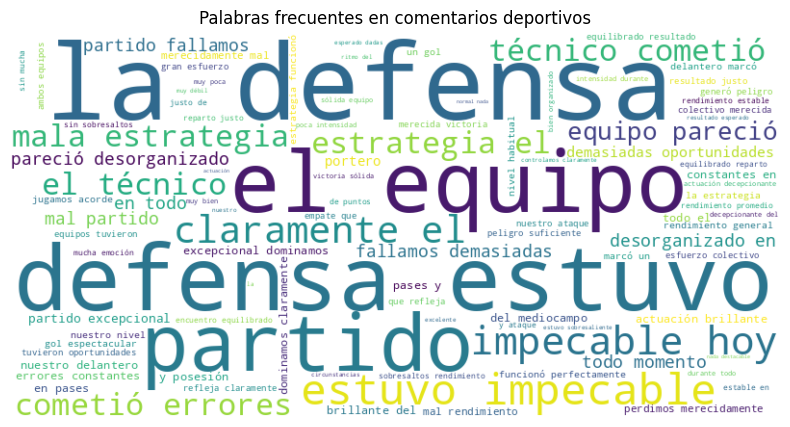

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar comentarios útiles
df_filtrado = df[df['comentario_limpio'].str.strip().astype(bool)]

# Unir todos los comentarios limpios
texto_total = ' '.join(df_filtrado['comentario_limpio'])

# Generar nube
if texto_total:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Palabras frecuentes en comentarios deportivos")
    plt.show()
else:
    print("⚠️ No hay palabras útiles después del preprocesamiento.")

/tmp/ipython-input-2183315899.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimiento', data=df, palette='viridis')


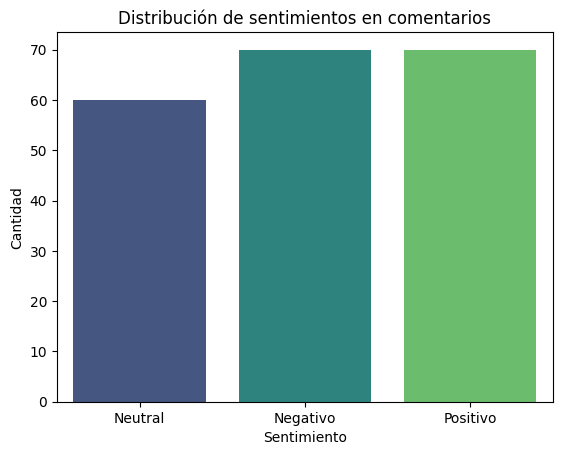

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar columna
if 'sentimiento' in df.columns:
    sns.countplot(x='sentimiento', data=df, palette='viridis')
    plt.title('Distribución de sentimientos en comentarios')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad')
    plt.show()
else:
    print("⚠️ No se encontró la columna 'sentimiento'.")

In [95]:
import ipywidgets as widgets
from IPython.display import display

sentimiento_widget = widgets.Dropdown(options=df['sentimiento'].unique(), description='Sentimiento:')

def mostrar_comentarios(sentimiento):
    seleccionados = df[df['sentimiento'] == sentimiento]
    display(seleccionados[['comentario', 'comentario_limpio']].sample(5))

widgets.interactive(mostrar_comentarios, sentimiento=sentimiento_widget)

interactive(children=(Dropdown(description='Sentimiento:', options=('Neutral', 'Negativo', 'Positivo'), value=…